In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:

#function to integrate
def f(x):
    return x**2

#actual integral value
def f_integral(x):
    return (1/3)*x**3

#integration function
def integrate(f,a,b,nsteps,middle=True):

    bin_size = (b-a)/nsteps #calculate bin size
    bins = np.arange(a,b+bin_size,bin_size) #bin size -> range
    f_bins = f(bins) #call f on this range

    bar_xs = bins[:-1]+bin_size/2 #So I can plot vs actual curve

    #Caculate average height of trapezoid
    if middle:
        averages = (f_bins[1:] + f_bins[:-1])/2
    else:
        averages = f_bins[:-1]

    return np.sum(averages*bin_size),bin_size,bar_xs,averages #return calculate value,bin size used,and values for plots

def get_error(integral_func,f,f_integral,a,b,start=10,end=1000,step=10):

    '''
    Is there a way to do something like this in numpy without a loop?
    i.e. call a function with one of the inputs as an array and then get an array of results?
    '''

    expected = f_integral(b)-f_integral(a) #calculated actual value
    steps = np.arange(start,end,step) #create a range for steps
    ferr = [] #save ferr
    bins = [] #save bins
    for s in steps:
        calculated,bin_size,_,_ = integral_func(f,a,b,s) #call the integrate function
        bins.append(bin_size)
        ferr.append(np.abs(calculated/expected - 1.))
    return steps,np.array(ferr),bins

## Plotting the integration bins on actual curve

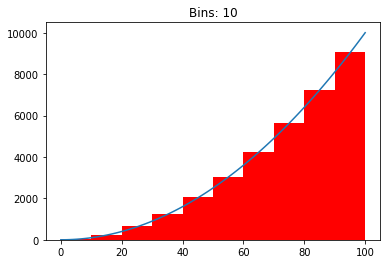

In [3]:
a,b = 0,100
steps = 10
xs = np.arange(a,b+1)
expected = f_integral(b)-f_integral(a)
_,bin_size,bar_xs,averages = integrate(f,a,b,steps)
plt.bar(bar_xs,averages,width=bin_size,color="red",zorder=0)
plt.plot(xs,f(xs),label="curve",zorder=1)
plt.title("Bins: " + str(steps))
plt.show()

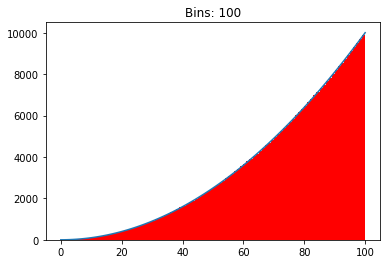

In [4]:
a,b = 0,100
steps = 100
xs = np.arange(a,b+1)
expected = f_integral(b)-f_integral(a)
_,bin_size,bar_xs,averages = integrate(f,a,b,steps)
plt.bar(bar_xs,averages,width=bin_size,color="red",zorder=0)
plt.plot(xs,f(xs),label="curve",zorder=1)
plt.title("Bins: " + str(steps))
plt.show()

## Plotting ferr against binsize
#### I don't think that the error ever gets close to machine precision

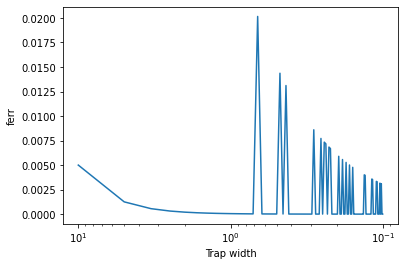

In [5]:
steps,ferr,bins = get_error(integral_func=integrate,
                            f=f,
                            f_integral=f_integral,
                            a=0,
                            b=100)

plt.plot(bins,ferr)
plt.xscale('log')
plt.xlabel("Trap width")
plt.ylabel("ferr")
plt.gca().invert_xaxis()
plt.show()